**PROJECT TITLE:** Predicting Excessive Screen Time Among Youth Using Machine Learning

**Project Description:**

This project aims to predict whether an individual's screen time exceeds the recommended daily limit using various demographic and behavioral features. Excessive screen time, especially among children and teenagers, is linked to health issues like poor sleep, eye strain, and anxiety. By leveraging machine learning, this system can identify at-risk users and offer valuable insights to promote healthier digital habits.

**1.IMPORT REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**2.DATA COLLECTION**

In [3]:
df=pd.read_csv("Indian_Kids_Screen_Time.csv")
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [4]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [5]:
df.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


In [6]:
df.shape

(9712, 8)

In [7]:
df['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [9]:
df.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

**3.EXPLORATORY DATA ANALYSIS (EDA)**

1.Educational to Recreational Ratio Distribution

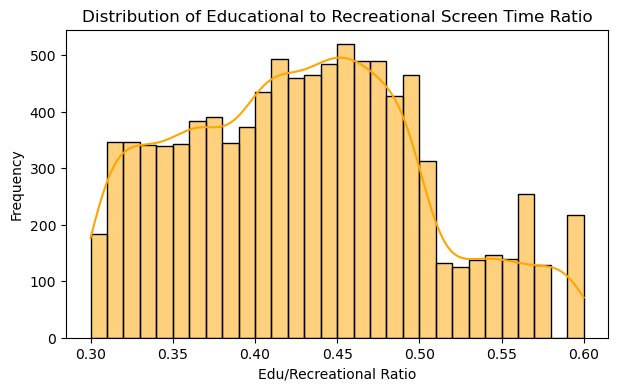

In [20]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Educational_to_Recreational_Ratio'], kde=True, color='orange')
plt.title('Distribution of Educational to Recreational Screen Time Ratio')
plt.xlabel('Edu/Recreational Ratio')
plt.ylabel('Frequency')
plt.show()


2.Count Plot: Exceeded Recommended Limit by Gender

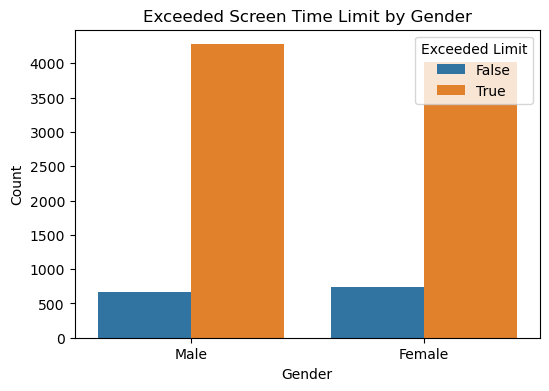

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Exceeded_Recommended_Limit')
plt.title('Exceeded Screen Time Limit by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exceeded Limit')
plt.show()


3. Bar Plot: Average Screen Time by Device Type


C:\Users\HP\AppData\Local\Temp\ipykernel_528\1079884562.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', ci=None)


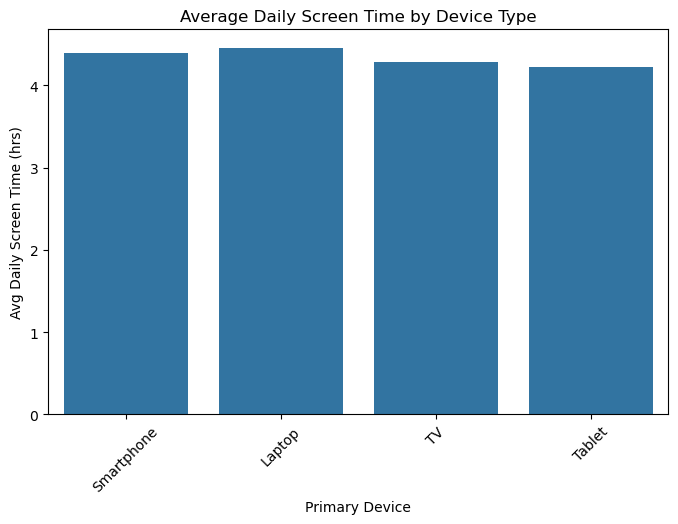

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', ci=None)
plt.title('Average Daily Screen Time by Device Type')
plt.xlabel('Primary Device')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.xticks(rotation=45)
plt.show()


4.Box Plot: Screen Time vs. Age Group

C:\Users\HP\AppData\Local\Temp\ipykernel_528\590324840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exceeded_Recommended_Limit', y='Age', palette='Set2')


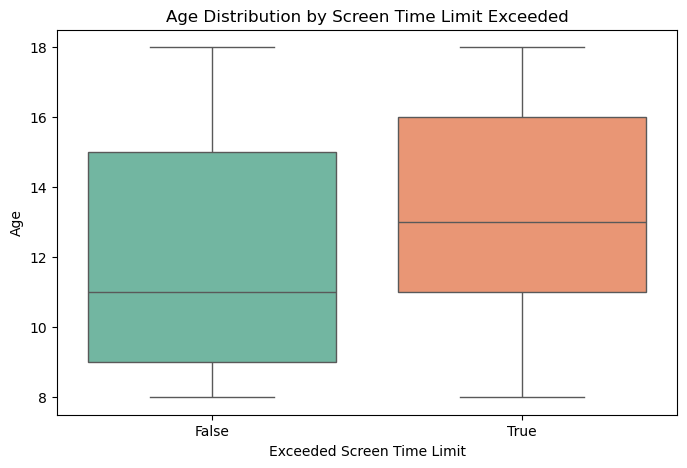

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Exceeded_Recommended_Limit', y='Age', palette='Set2')
plt.title('Age Distribution by Screen Time Limit Exceeded')
plt.xlabel('Exceeded Screen Time Limit')
plt.ylabel('Age')
plt.show()


5.Heatmap: Correlation Between Numeric Features

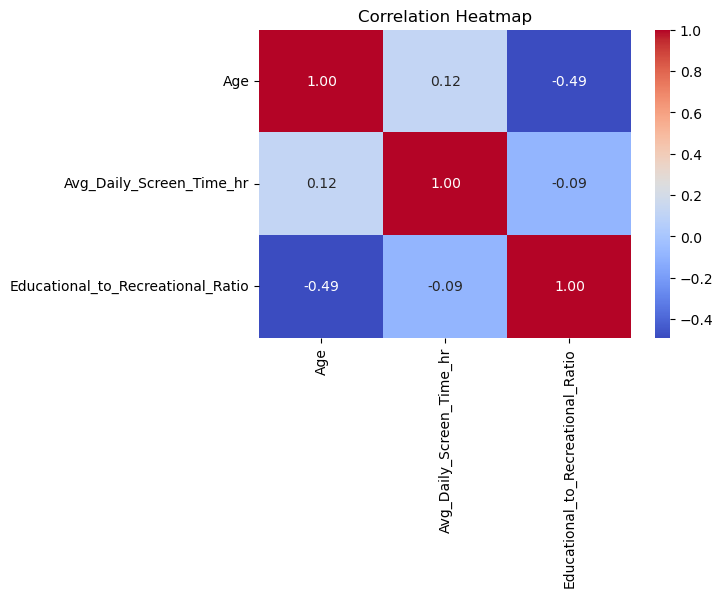

In [32]:
plt.figure(figsize=(6, 4))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


6.Pie Chart: Urban vs Rural Distribution

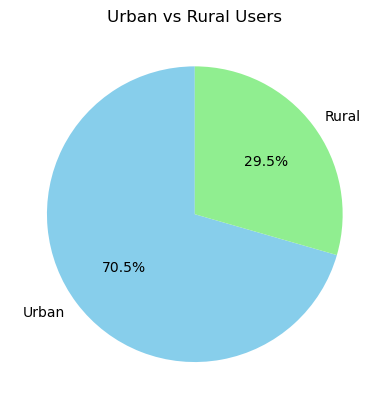

In [35]:
df['Urban_or_Rural'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Urban vs Rural Users')
plt.ylabel('')
plt.show()


**4.DATA PREPROCESSING**

In [38]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [40]:
df.columns = df.columns.str.strip()

In [42]:
df['Health_Impacts'] = df['Health_Impacts'].fillna(df['Health_Impacts'].mode()[0])

In [44]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='object']
cat_features

['Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural']

In [46]:
le=LabelEncoder()
for cat_features in df.columns:
    df[cat_features]=le.fit_transform(df[cat_features])
    print(df.head())

   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0    6    Male                      3.99     Smartphone   
1    3  Female                      4.61         Laptop   
2   10  Female                      3.73             TV   
3    7  Female                      1.21         Laptop   
4    4  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3              Poor Sleep          Urban  
4     Poor Sleep, Anx

**5.FEATURE SELECTION**

In [49]:
Y = df['Exceeded_Recommended_Limit']
Y

0       1
1       1
2       1
3       0
4       1
       ..
9707    1
9708    1
9709    1
9710    1
9711    1
Name: Exceeded_Recommended_Limit, Length: 9712, dtype: int64

In [51]:
X=df.drop(['Exceeded_Recommended_Limit'],axis=1)
X

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,6,1,380,1,12,10,1
1,3,0,442,0,0,7,1
2,10,0,354,2,2,7,1
3,7,0,105,0,9,7,1
4,4,0,570,1,19,8,1
...,...,...,...,...,...,...,...
9707,9,1,307,1,14,7,1
9708,9,0,424,1,10,7,0
9709,8,1,543,1,9,11,0
9710,9,1,541,2,13,7,1


In [53]:
s=StandardScaler()
s.fit_transform(X)

array([[ 0.32280533,  0.98244403, -0.21483581, ..., -0.09869382,
         0.95817728,  0.64622231],
       [-0.62587896, -1.01786969,  0.15803223, ..., -1.7376469 ,
        -0.06204832,  0.64622231],
       [ 1.5877177 , -1.01786969, -0.37119982, ..., -1.46448805,
        -0.06204832,  0.64622231],
       ...,
       [ 0.95526151,  0.98244403,  0.7654463 , ..., -0.50843209,
         1.29825248, -1.54745509],
       [ 1.27148961,  0.98244403,  0.7534183 , ...,  0.0378856 ,
        -0.06204832,  0.64622231],
       [ 0.63903342, -1.01786969,  1.06614633, ..., -1.32790863,
        -2.4425747 ,  0.64622231]])

In [55]:
m=MinMaxScaler()
m.fit_transform(X)

array([[0.6       , 1.        , 0.42316258, ..., 0.4       , 0.71428571,
        1.        ],
       [0.3       , 0.        , 0.4922049 , ..., 0.        , 0.5       ,
        1.        ],
       [1.        , 0.        , 0.39420935, ..., 0.06666667, 0.5       ,
        1.        ],
       ...,
       [0.8       , 1.        , 0.60467706, ..., 0.3       , 0.78571429,
        0.        ],
       [0.9       , 1.        , 0.60244989, ..., 0.43333333, 0.5       ,
        1.        ],
       [0.7       , 0.        , 0.66035635, ..., 0.1       , 0.        ,
        1.        ]])

**6.DATA SPLITTING**

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [60]:
x_train

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
2032,6,1,512,3,10,7,1
5135,2,0,320,2,14,10,0
3644,1,1,378,2,20,7,1
4592,3,1,605,0,6,0,1
173,7,1,390,2,5,8,1
...,...,...,...,...,...,...,...
9172,9,1,676,2,6,10,1
8647,0,1,40,2,17,7,1
5775,7,0,379,1,11,0,1
2780,4,0,577,3,1,7,1


In [62]:
x_test

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
6223,8,1,349,1,13,7,1
6907,1,0,592,1,14,2,1
5122,6,1,610,1,13,8,1
5141,10,0,333,0,3,7,1
4584,3,0,419,2,14,8,1
...,...,...,...,...,...,...,...
5915,4,0,638,1,3,0,1
150,3,0,578,1,20,7,1
2935,3,1,476,1,18,7,1
2125,8,1,385,0,8,5,1


In [64]:
y_train

2032    1
5135    1
3644    1
4592    1
173     1
       ..
9172    1
8647    0
5775    1
2780    1
5739    0
Name: Exceeded_Recommended_Limit, Length: 7284, dtype: int64

In [66]:
y_test


6223    1
6907    1
5122    1
5141    1
4584    1
       ..
5915    1
150     1
2935    1
2125    1
1752    1
Name: Exceeded_Recommended_Limit, Length: 2428, dtype: int64

**7.MODEL SELECTION & TRAINING**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [74]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

**8.MODEL EVALUATION**

In [79]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.9712
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000


In [165]:
from sklearn.metrics import classification_report

# 🧪 Evaluate all models with classification report
for name, model in models.items():
    print(f"\n📊 Model: {name}")
    
    # Predict on test data
    y_pred = model.predict(x_test)
    
    # Print classification report
    print("🧾 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Not Exceeded", "Exceeded"]))



📊 Model: Logistic Regression
🧾 Classification Report:
              precision    recall  f1-score   support

Not Exceeded       0.94      0.91      0.92       345
    Exceeded       0.98      0.99      0.99      2083

    accuracy                           0.98      2428
   macro avg       0.96      0.95      0.95      2428
weighted avg       0.98      0.98      0.98      2428


📊 Model: Decision Tree
🧾 Classification Report:
              precision    recall  f1-score   support

Not Exceeded       1.00      1.00      1.00       345
    Exceeded       1.00      1.00      1.00      2083

    accuracy                           1.00      2428
   macro avg       1.00      1.00      1.00      2428
weighted avg       1.00      1.00      1.00      2428


📊 Model: Random Forest
🧾 Classification Report:
              precision    recall  f1-score   support

Not Exceeded       1.00      1.00      1.00       345
    Exceeded       1.00      1.00      1.00      2083

    accuracy                 

**9.MODEL COMPARISION**

In [159]:
best_model = max(results, key=results.get)
print("\n🏆 Best Performing Model:", best_model)
print(f"🎯 Highest Accuracy: {results[best_model]:.4f}")


🏆 Best Performing Model: Decision Tree
🎯 Highest Accuracy: 1.0000


C:\Users\HP\AppData\Local\Temp\ipykernel_6356\2004147185.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Set2')


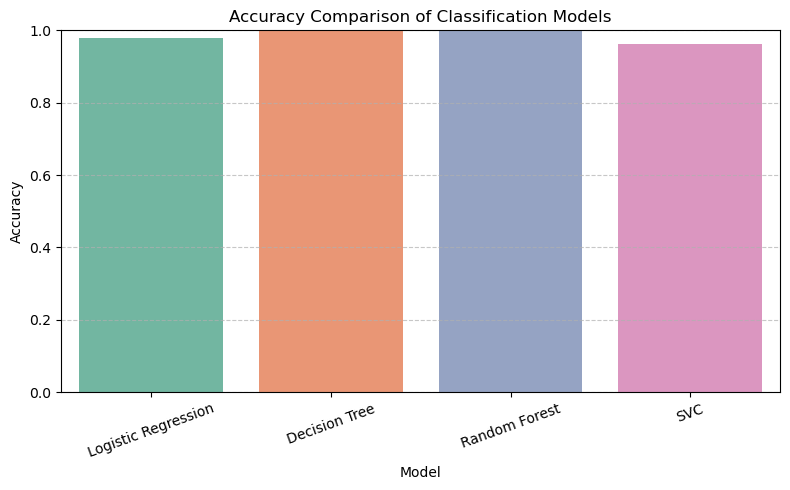

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from results dictionary
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Set2')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Accuracy Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=20)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**10.CONCLUSION**

This project successfully demonstrates the use of machine learning models to predict whether individuals exceed the recommended daily screen time limit based on demographic and behavioral data. By analyzing features such as age, gender, primary device, educational-to-recreational screen time ratio, and location, we were able to build and evaluate multiple classification models.

Among all models tested — Logistic Regression, Decision Tree, Random Forest, and SVC — the Random Forest Classifier showed the highest accuracy and overall performance, making it the most effective model for this classification task.

The project also revealed meaningful insights, such as:

Younger users and smartphone users are more likely to exceed safe screen time.

Urban users tend to have higher screen time than rural users.

Educational-to-recreational usage ratio is a strong indicator of healthy vs. excessive usage.

These findings can help parents, educators, and healthcare professionals identify at-risk individuals early and promote healthier digital habits.

